<a href="https://colab.research.google.com/github/Tridev041/Gen-Ai-/blob/main/MP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install demoji
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import string
import re
import demoji
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
tweet_data=pd.read_csv("/content/labeled_data.csv")

In [ ]:
print(tweet_data.shape)

(24783, 7)


In [ ]:
tweet_data.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [ ]:
tweet_data.head()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [ ]:
tweet_data.tail()

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
24779  you've gone and broke the wrong heart baby, an...  
24780  young buck wanna eat!!.. dat nigguh like I ain...  
24781              youu got wild bitches tellin you lies  
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...

In [ ]:
tweet_data.sample(5)


Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
2533         2588      3            0                   3        0      1   
5003         5152      6            1                   5        0      1   
5033         5183      3            0                   1        2      2   
2815         2884      3            0                   1        2      2   
10368       10646      3            0                   3        0      1   

                                                   tweet  
2533                @BUNNYDaHONEY &lt;= got all the hoes  
5003              @TinnyTimm taylor wack ass bitch nigga  
5033   @TreyDoe_: @HallDerik @20ToLife_ once fag." Yo...  
2815   @ChaldeanCutie really? @RileyAintShit @KILLShe...  
10368                I got money and hoes money and hoes

In [ ]:
tweet_data=tweet_data.drop(['Unnamed: 0'],axis=1)
tweet_data

count  hate_speech  offensive_language  neither  class  \
0          3            0                   0        3      2   
1          3            0                   3        0      1   
2          3            0                   3        0      1   
3          3            0                   2        1      1   
4          6            0                   6        0      1   
...      ...          ...                 ...      ...    ...   
24778      3            0                   2        1      1   
24779      3            0                   1        2      2   
24780      3            0                   3        0      1   
24781      6            0                   6        0      1   
24782      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @mayasolovely: As a woman you shouldn't...  
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
...                                                  ...  
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
24779  you've gone and broke the wrong heart baby, an...  
24780  young buck wanna eat!!.. dat nigguh like I ain...  
24781              youu got wild bitches tellin you lies  
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...  

[24783 rows x 6 columns]

In [ ]:
tweet_data.isna().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
tweet_data.duplicated().sum()

0

In [ ]:
tweet_data.describe()

count   hate_speech  offensive_language       neither  \
count  24783.000000  24783.000000        24783.000000  24783.000000   
mean       3.243473      0.280515            2.413711      0.549247   
std        0.883060      0.631851            1.399459      1.113299   
min        3.000000      0.000000            0.000000      0.000000   
25%        3.000000      0.000000            2.000000      0.000000   
50%        3.000000      0.000000            3.000000      0.000000   
75%        3.000000      0.000000            3.000000      0.000000   
max        9.000000      7.000000            9.000000      9.000000   

              class  
count  24783.000000  
mean       1.110277  
std        0.462089  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        2.000000

<ipython-input-13-5a55d0d267c1>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  data_plot.set_xticklabels(data_plot.get_xticklabels(), rotation=45)


[Text(0, 0, 'count'),
 Text(1, 0, 'hate_speech'),
 Text(2, 0, 'offensive_language'),
 Text(3, 0, 'neither'),
 Text(4, 0, 'class')]

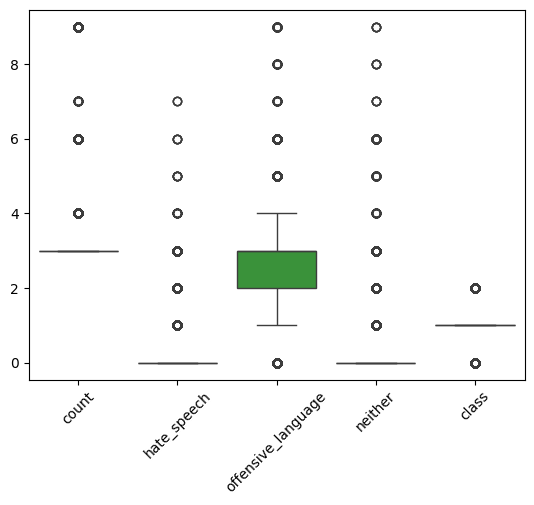

In [ ]:
data_plot=sns.boxplot(data=tweet_data)

data_plot.set_xticklabels(data_plot.get_xticklabels(), rotation=45)

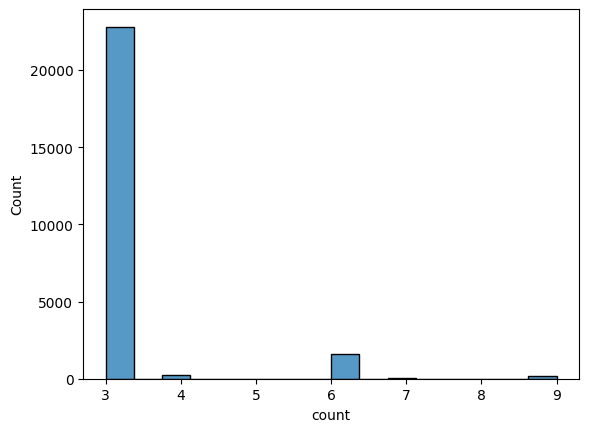

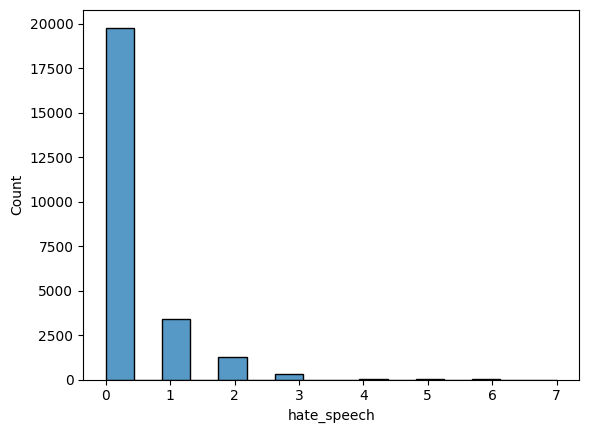

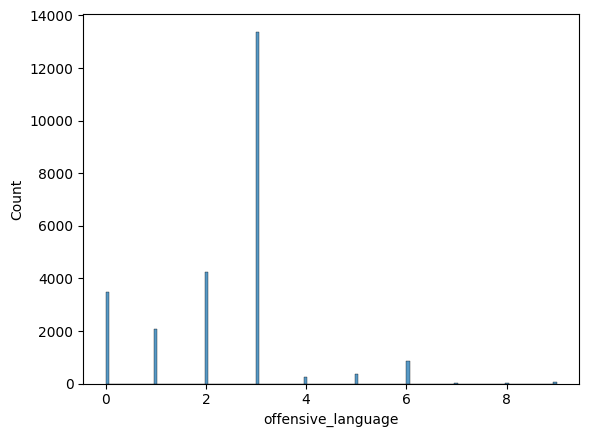

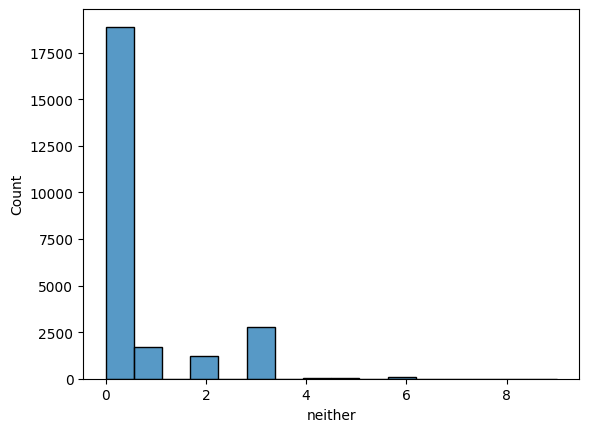

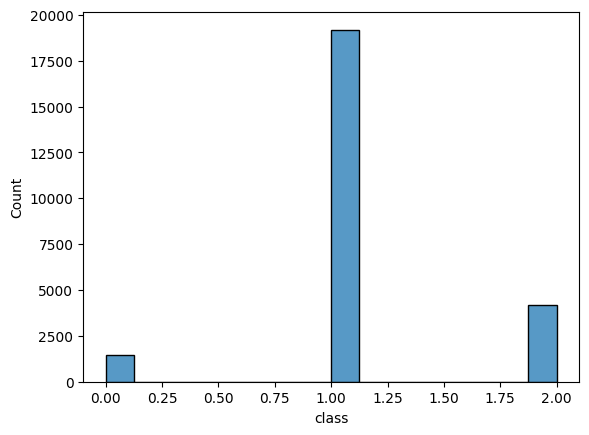

In [ ]:
for col in tweet_data[['count', 'hate_speech', 'offensive_language', 'neither',
       'class']]:
    sns.histplot(tweet_data[col])
    plt.show()

In [ ]:
tweet_data[tweet_data['hate_speech']>0].describe()

count  hate_speech  offensive_language      neither        class
count  4993.000000  4993.000000         4993.000000  4993.000000  4993.000000
mean      3.382936     1.392349            1.827759     0.162828     0.764070
std       1.124272     0.658461            1.256703     0.594213     0.530344
min       3.000000     1.000000            0.000000     0.000000     0.000000
25%       3.000000     1.000000            1.000000     0.000000     0.000000
50%       3.000000     1.000000            2.000000     0.000000     1.000000
75%       3.000000     2.000000            2.000000     0.000000     1.000000
max       9.000000     7.000000            8.000000     8.000000     2.000000

In [ ]:
tweet_data[tweet_data['offensive_language']>0].describe()

count   hate_speech  offensive_language       neither  \
count  21308.000000  21308.000000        21308.000000  21308.000000   
mean       3.263328      0.266942            2.807349      0.189037   
std        0.916658      0.578783            1.082944      0.572051   
min        3.000000      0.000000            1.000000      0.000000   
25%        3.000000      0.000000            2.000000      0.000000   
50%        3.000000      0.000000            3.000000      0.000000   
75%        3.000000      0.000000            3.000000      0.000000   
max        9.000000      7.000000            9.000000      8.000000   

              class  
count  21308.000000  
mean       1.000751  
std        0.315283  
min        0.000000  
25%        1.000000  
50%        1.000000  
75%        1.000000  
max        2.000000

In [ ]:
tweet_data[tweet_data['neither']>0].describe()

count  hate_speech  offensive_language      neither        class
count  5891.000000  5891.000000         5891.000000  5891.000000  5891.000000
mean      3.248175     0.108301            0.829231     2.310643     1.685113
std       0.899459     0.422802            1.138030     1.069688     0.508816
min       3.000000     0.000000            0.000000     1.000000     0.000000
25%       3.000000     0.000000            0.000000     1.000000     1.000000
50%       3.000000     0.000000            0.000000     3.000000     2.000000
75%       3.000000     0.000000            2.000000     3.000000     2.000000
max       9.000000     7.000000            8.000000     9.000000     2.000000

In [ ]:
tweet_data[tweet_data['class']==0].describe()

count  hate_speech  offensive_language      neither   class
count  1430.000000  1430.000000         1430.000000  1430.000000  1430.0
mean      3.108392     2.256643            0.755944     0.095804     0.0
std       0.648084     0.573994            0.487653     0.326007     0.0
min       3.000000     2.000000            0.000000     0.000000     0.0
25%       3.000000     2.000000            0.000000     0.000000     0.0
50%       3.000000     2.000000            1.000000     0.000000     0.0
75%       3.000000     2.000000            1.000000     0.000000     0.0
max       9.000000     7.000000            4.000000     4.000000     0.0

In [ ]:
tweet_data[tweet_data['class']==1].describe()

count   hate_speech  offensive_language       neither    class
count  19190.000000  19190.000000        19190.000000  19190.000000  19190.0
mean       3.268890      0.180459            3.003544      0.084888      1.0
std        0.923024      0.407220            0.954097      0.284093      0.0
min        3.000000      0.000000            2.000000      0.000000      1.0
25%        3.000000      0.000000            3.000000      0.000000      1.0
50%        3.000000      0.000000            3.000000      0.000000      1.0
75%        3.000000      0.000000            3.000000      0.000000      1.0
max        9.000000      4.000000            9.000000      3.000000      1.0

In [ ]:
tweet_data[tweet_data['class']==2].describe()


count  hate_speech  offensive_language      neither   class
count  4163.000000  4163.000000         4163.000000  4163.000000  4163.0
mean      3.172712     0.062935            0.264233     2.845544     2.0
std       0.746097     0.253524            0.461737     0.795181     0.0
min       3.000000     0.000000            0.000000     2.000000     2.0
25%       3.000000     0.000000            0.000000     2.000000     2.0
50%       3.000000     0.000000            0.000000     3.000000     2.0
75%       3.000000     0.000000            1.000000     3.000000     2.0
max       9.000000     3.000000            4.000000     9.000000     2.0

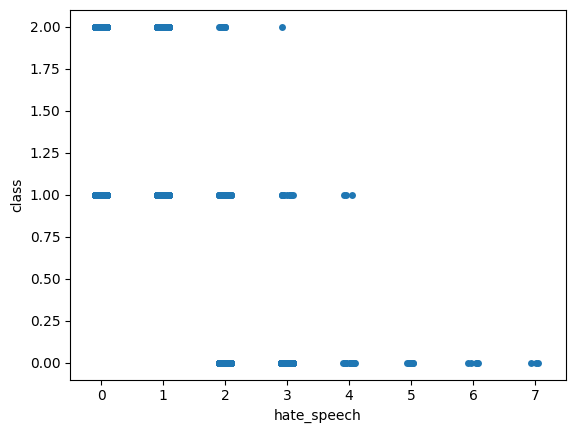

In [ ]:
sns.stripplot(data=tweet_data, x="hate_speech", y="class")
plt.show()

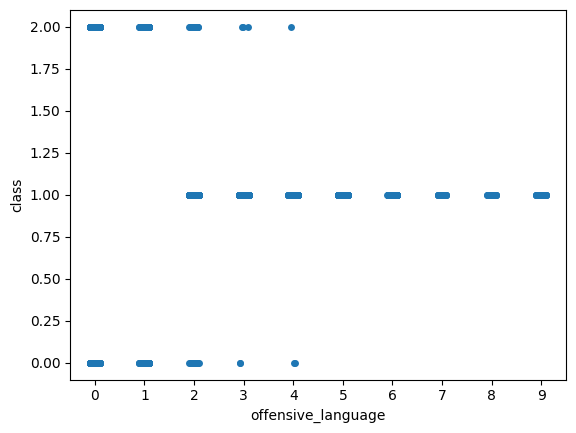

In [ ]:
sns.stripplot(data=tweet_data, x="offensive_language", y="class")
plt.show()

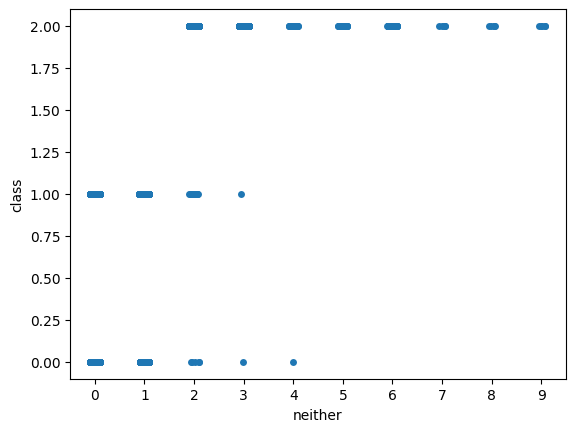

In [ ]:
sns.stripplot(data=tweet_data, x="neither", y="class")
plt.show()

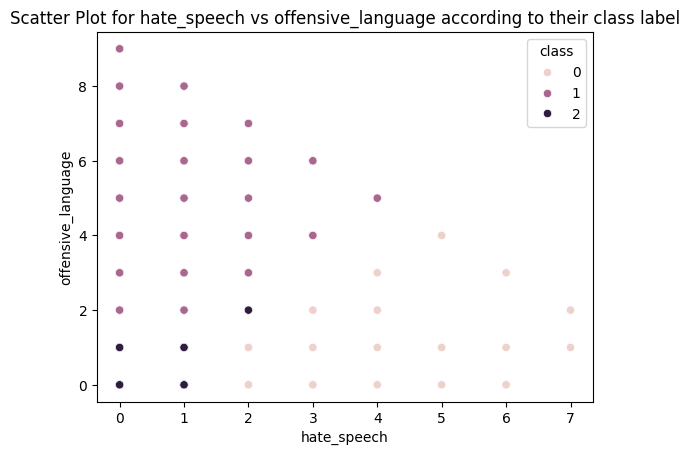

In [ ]:
sns.scatterplot(x = "hate_speech", y = "offensive_language", data = tweet_data, hue = "class")
plt.title("Scatter Plot for hate_speech vs offensive_language according to their class label")
plt.show()

In [ ]:
tweet_data.groupby(['class']).count()

count  hate_speech  offensive_language  neither  tweet
class                                                        
0       1430         1430                1430     1430   1430
1      19190        19190               19190    19190  19190
2       4163         4163                4163     4163   4163

In [ ]:
len(tweet_data[(tweet_data['hate_speech']>0)&(tweet_data['class']==0)])/len(tweet_data)*100

5.770084332001776

In [ ]:
len(tweet_data[(tweet_data['hate_speech']>0)&(tweet_data['class']==1)])/len(tweet_data)*100

13.359964491788725

In [ ]:
len(tweet_data[(tweet_data['hate_speech']>0)&(tweet_data['class']==2)])/len(tweet_data)*100

1.0168260501149982

In [ ]:
len(tweet_data[(tweet_data['offensive_language']>0)&(tweet_data['class']==0)])/len(tweet_data)*100

4.240810232820885

In [ ]:
len(tweet_data[(tweet_data['offensive_language']>0)&(tweet_data['class']==1)])/len(tweet_data)*100

77.43211072105879

In [ ]:
len(tweet_data[(tweet_data['offensive_language']>0)&(tweet_data['class']==2)])/len(tweet_data)*100

4.305370616955171

In [ ]:
len(tweet_data[(tweet_data['neither']>0)&(tweet_data['class']==0)])/len(tweet_data)*100

0.5124480490658919

In [ ]:
len(tweet_data[(tweet_data['neither']>0)&(tweet_data['class']==1)])/len(tweet_data)*100

6.460073437436953

In [ ]:
len(tweet_data[(tweet_data['neither']>0)&(tweet_data['class']==2)])/len(tweet_data)*100

16.797804946939436

<Axes: >

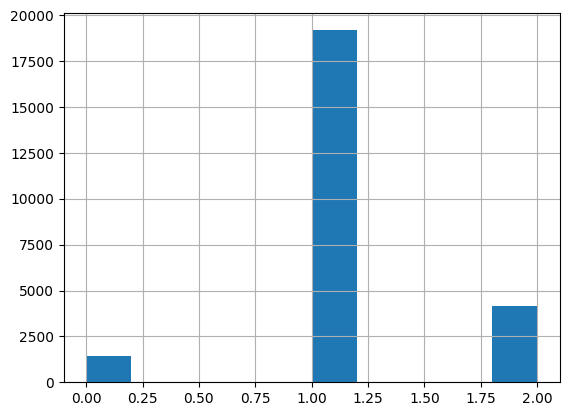

In [ ]:
tweet_data['class'].hist()

In [ ]:
tweet_data["tweet"] = tweet_data["tweet"].astype(str)

In [ ]:
print(string.punctuation)
def remove_punctuation(tweet):
    punctuationfree="".join([i for i in tweet if i not in string.punctuation])
    return punctuationfree

tweet_data['preprocess_tweet']= tweet_data['tweet'].apply(lambda x:remove_punctuation(x))
tweet_data.head()

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    preprocess_tweet  
0   RT mayasolovely As a woman you shouldnt compl...  
1   RT mleew17 boy dats coldtyga dwn bad for cuff...  
2   RT UrKindOfBrand Dawg RT 80sbaby4life You eve...  
3     RT CGAnderson vivabased she look like a tranny  
4   RT ShenikaRoberts The shit you hear about me ...

In [ ]:
tweet_data['preprocess_tweet']= tweet_data['preprocess_tweet'].apply(lambda x: x.lower())
tweet_data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    preprocess_tweet  
0   rt mayasolovely as a woman you shouldnt compl...  
1   rt mleew17 boy dats coldtyga dwn bad for cuff...  
2   rt urkindofbrand dawg rt 80sbaby4life you eve...  
3     rt cganderson vivabased she look like a tranny  
4   rt shenikaroberts the shit you hear about me ...

In [ ]:
def tokenization(tweet):
    tokens = re.split('W+',tweet)
    return tokens

tweet_data['preprocess_tweet']= tweet_data['preprocess_tweet'].apply(lambda x: tokenization(x))
tweet_data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    preprocess_tweet  
0  [ rt mayasolovely as a woman you shouldnt comp...  
1  [ rt mleew17 boy dats coldtyga dwn bad for cuf...  
2  [ rt urkindofbrand dawg rt 80sbaby4life you ev...  
3  [ rt cganderson vivabased she look like a tranny]  
4  [ rt shenikaroberts the shit you hear about me...

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[0:10])

def remove_stopwords(Tweet):
    output= [i for i in Tweet if i not in stopwords]
    return output

tweet_data['preprocess_tweet']= tweet_data['preprocess_tweet'].apply(lambda x:remove_stopwords(x))
tweet_data.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    preprocess_tweet  
0  [ rt mayasolovely as a woman you shouldnt comp...  
1  [ rt mleew17 boy dats coldtyga dwn bad for cuf...  
2  [ rt urkindofbrand dawg rt 80sbaby4life you ev...  
3  [ rt cganderson vivabased she look like a tranny]  
4  [ rt shenikaroberts the shit you hear about me...

In [ ]:
porter_stemmer = PorterStemmer()

def stemming(Tweet):
    stem_Tweet = [porter_stemmer.stem(word) for word in Tweet]
    return stem_Tweet

tweet_data['preprocess_tweet']=tweet_data['preprocess_tweet'].apply(lambda x: stemming(x))
tweet_data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    preprocess_tweet  
0  [ rt mayasolovely as a woman you shouldnt comp...  
1  [ rt mleew17 boy dats coldtyga dwn bad for cuf...  
2  [ rt urkindofbrand dawg rt 80sbaby4life you ev...  
3  [ rt cganderson vivabased she look like a tranni]  
4  [ rt shenikaroberts the shit you hear about me...

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(Tweet):
    lemm_Tweet = [wordnet_lemmatizer.lemmatize(word) for word in Tweet]
    return lemm_Tweet

tweet_data['preprocess_tweet']=tweet_data['preprocess_tweet'].apply(lambda x:lemmatizer(x))
tweet_data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    preprocess_tweet  
0  [ rt mayasolovely as a woman you shouldnt comp...  
1  [ rt mleew17 boy dats coldtyga dwn bad for cuf...  
2  [ rt urkindofbrand dawg rt 80sbaby4life you ev...  
3  [ rt cganderson vivabased she look like a tranni]  
4  [ rt shenikaroberts the shit you hear about me...

In [ ]:
def get_sentence(words):
    sentence = ' '.join(words)
    return sentence

tweet_data['preprocess_tweet']=tweet_data['preprocess_tweet'].apply(lambda x: get_sentence(x))
tweet_data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    preprocess_tweet  
0   rt mayasolovely as a woman you shouldnt compl...  
1   rt mleew17 boy dats coldtyga dwn bad for cuff...  
2   rt urkindofbrand dawg rt 80sbaby4life you eve...  
3     rt cganderson vivabased she look like a tranni  
4   rt shenikaroberts the shit you hear about me ...

In [ ]:
def remove_emoji(tweet):
    dem = demoji.findall(tweet)
    for item in dem.keys():
        tweet = tweet.replace(item, '')
    return tweet

tweet_data['preprocess_tweet']= tweet_data['preprocess_tweet'].apply(lambda x: remove_emoji(x))
tweet_data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    preprocess_tweet  
0   rt mayasolovely as a woman you shouldnt compl...  
1   rt mleew17 boy dats coldtyga dwn bad for cuff...  
2   rt urkindofbrand dawg rt 80sbaby4life you eve...  
3     rt cganderson vivabased she look like a tranni  
4   rt shenikaroberts the shit you hear about me ...

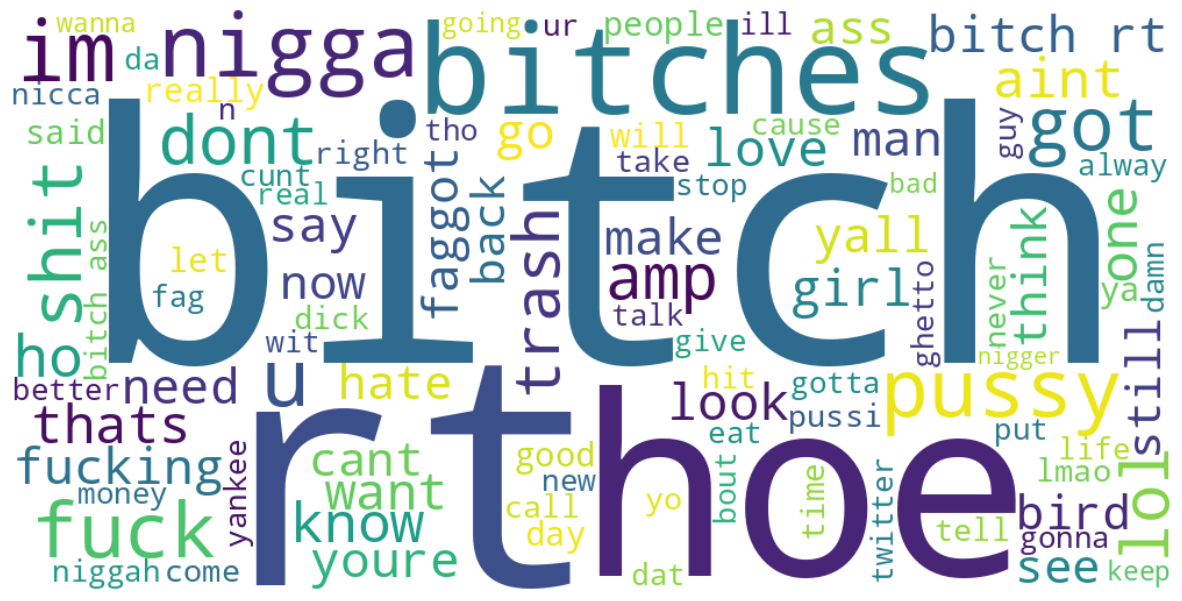

In [ ]:
tweet=" ".join(i for i in tweet_data.preprocess_tweet)
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords, max_words=100,
                min_font_size = 10).generate(tweet)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
tweet_data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    preprocess_tweet  
0   rt mayasolovely as a woman you shouldnt compl...  
1   rt mleew17 boy dats coldtyga dwn bad for cuff...  
2   rt urkindofbrand dawg rt 80sbaby4life you eve...  
3     rt cganderson vivabased she look like a tranni  
4   rt shenikaroberts the shit you hear about me ...

In [ ]:
tweet_data_hate = tweet_data[tweet_data["class"]==0]
tweet_data_offensive = tweet_data[tweet_data["class"]==1]
tweet_data_neither = tweet_data[tweet_data["class"]==2]

In [ ]:
print(tweet_data_hate.shape)

(1430, 7)


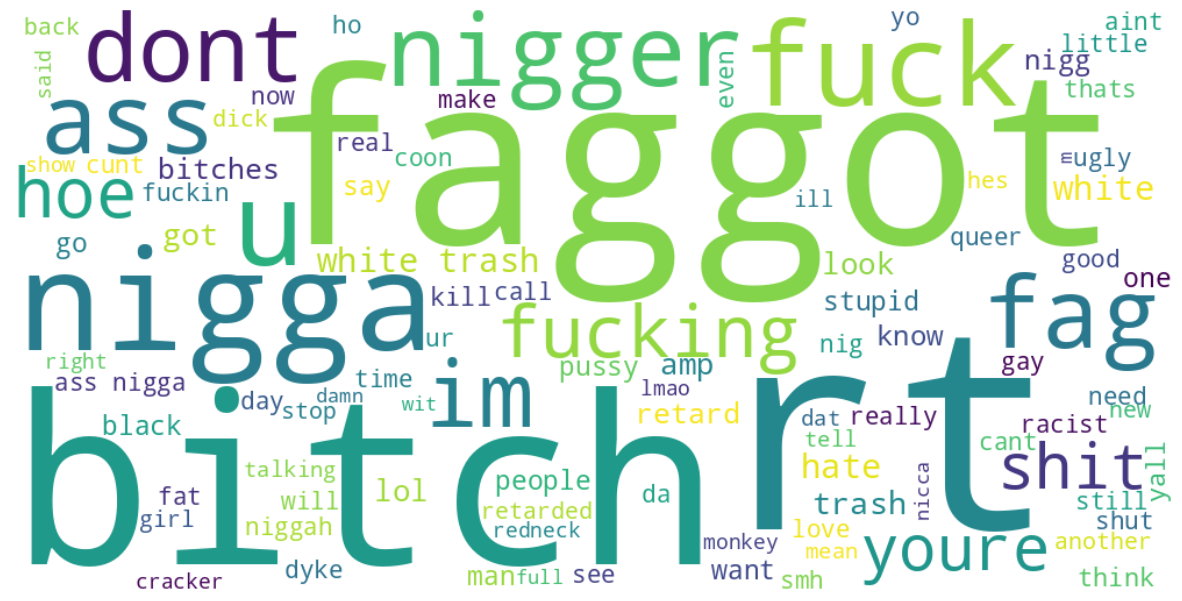

In [ ]:
tweet=" ".join(i for i in tweet_data_hate.preprocess_tweet)
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords, max_words=100,
                min_font_size = 10).generate(tweet)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

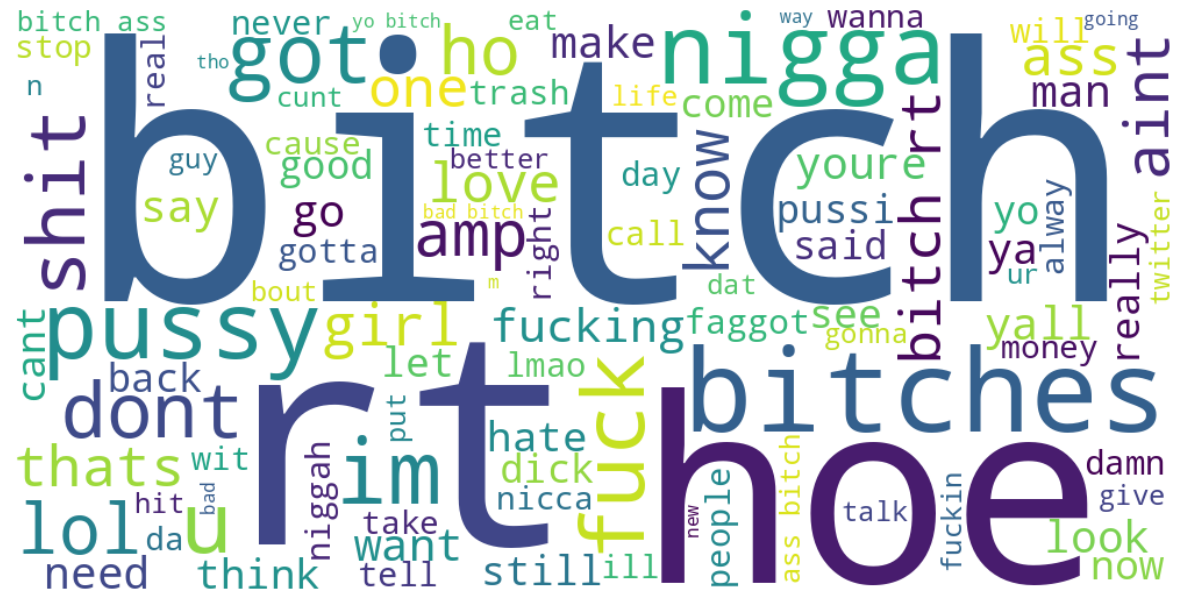

In [ ]:
tweet=" ".join(i for i in tweet_data_offensive.preprocess_tweet)
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords, max_words=100,
                min_font_size = 10).generate(tweet)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

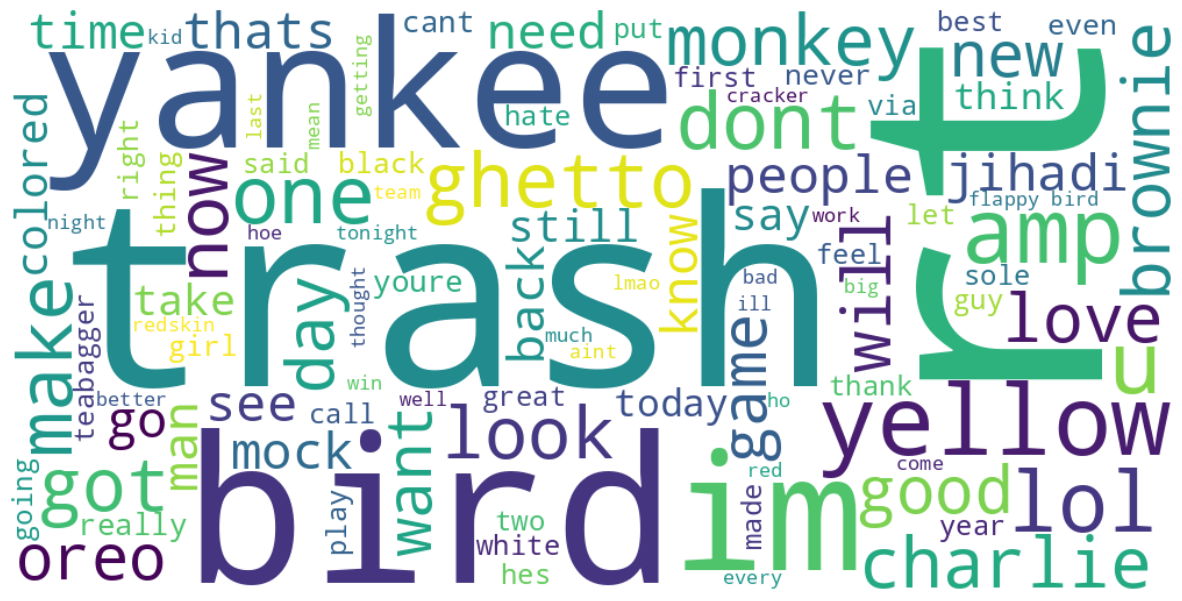

In [ ]:
tweet=" ".join(i for i in tweet_data_neither.preprocess_tweet)
stopwords=set(STOPWORDS)
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords, max_words=100,
                min_font_size = 10).generate(tweet)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
def getPolarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity

tweet_data['polarity']=tweet_data['preprocess_tweet'].apply(getPolarity)
tweet_data.sample(5)

count  hate_speech  offensive_language  neither  class  \
1357       3            0                   3        0      1   
1842       3            0                   3        0      1   
3560       6            2                   3        1      1   
18133      3            0                   3        0      1   
1783       3            0                   3        0      1   

                                                   tweet  \
1357   &#8220;@KeAuraM: &#8220;@whitegoddesss: Repost...   
1842   &#8220;@lilthickgawdess: @ a girl who's a hoe ...   
3560   @JPantsdotcom @Todd__Kincannon @the__realtony ...   
18133  RT @YaBoyKip: "I hope this bitch ain't a catfi...   
1783   &#8220;@iKayKing: Things hoes say... https://t...   

                                        preprocess_tweet  polarity  
1357   8220keauram 8220whitegoddesss repost  httptcog...       0.0  
1842   8220lilthickgawdess  a girl whos a hoe on twit...       0.0  
3560   jpantsdotcom toddkincannon therealtony naaaaa ...       0.6  
18133  rt yaboykip i hope this bitch aint a catfish h...       0.0  
1783   8220ikayking things hoes say httpstcoi9zs1oud0...       0.0

In [ ]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
tweet_data['sentiment']=tweet_data['polarity'].apply(getAnalysis)
tweet_data.sample(5)

count  hate_speech  offensive_language  neither  class  \
14352      3            0                   2        1      1   
24496      3            0                   2        1      1   
14419      3            0                   0        3      2   
1021       3            0                   3        0      1   
21308      3            0                   3        0      1   

                                                   tweet  \
14352  RT @BestOfMessages: Lil hoe http://t.co/kIAoQY...   
24496                        that hoe aint there anymore   
14419  RT @BlasianBytch: @graceishuman @rhiannonrevol...   
1021   &#128530;RT @LiViBADD88: so many pretty bitche...   
21308              Tell them hoes "I'm all friended out"   

                                        preprocess_tweet  polarity sentiment  
14352        rt bestofmessages lil hoe httptcokiaoqyr3i4     0.000   Neutral  
24496                         that hoe aint there anymor     0.000   Neutral  
14419  rt blasianbytch graceishuman rhiannonrevolts y...     0.000   Neutral  
1021   128530rt livibadd88 so many pretty bitches com...     0.375  Positive  
21308                 tell them hoes im all friended out     0.000   Neutral

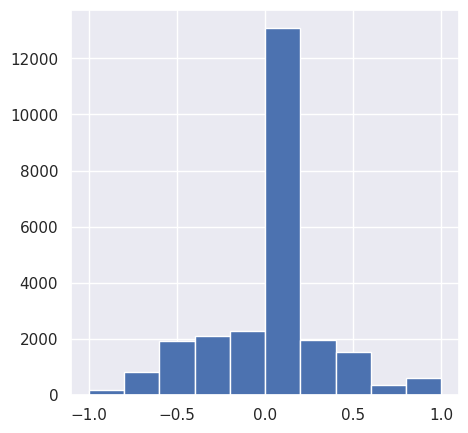

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
tweet_data['polarity'].hist()
plt.show()

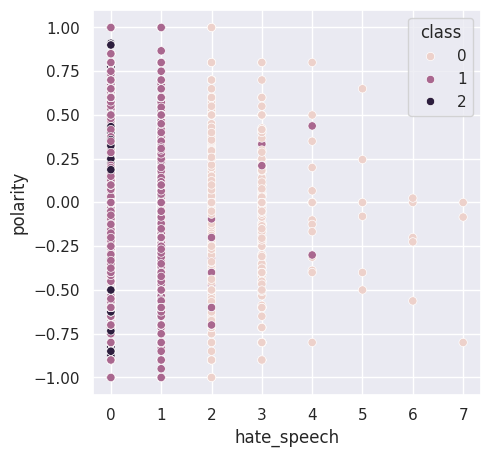

In [ ]:
sns.scatterplot(x = "hate_speech", y = "polarity", data = tweet_data, hue = "class")
plt.show()

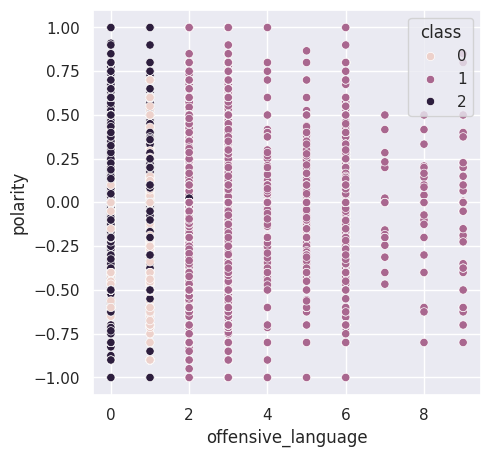

In [ ]:
sns.scatterplot(x = "offensive_language", y = "polarity", data = tweet_data, hue = "class")
plt.show()

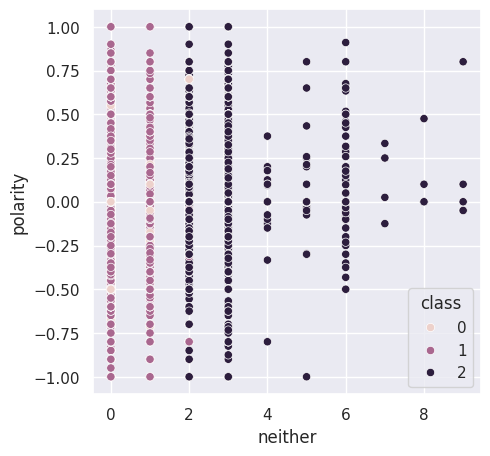

In [ ]:
sns.scatterplot(x = "neither", y = "polarity", data = tweet_data, hue = "class")
plt.show()

In [ ]:
tweet_data_negative = tweet_data[tweet_data["sentiment"]=='Negative']
tweet_data_positive = tweet_data[tweet_data["sentiment"]=='Positive']
tweet_data_neutral = tweet_data[tweet_data["sentiment"]=='Neutral']

In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
count_values_in_column(tweet_data,"sentiment")

Total  Percentage
sentiment                   
Neutral    10254       41.38
Negative    7271       29.34
Positive    7258       29.29

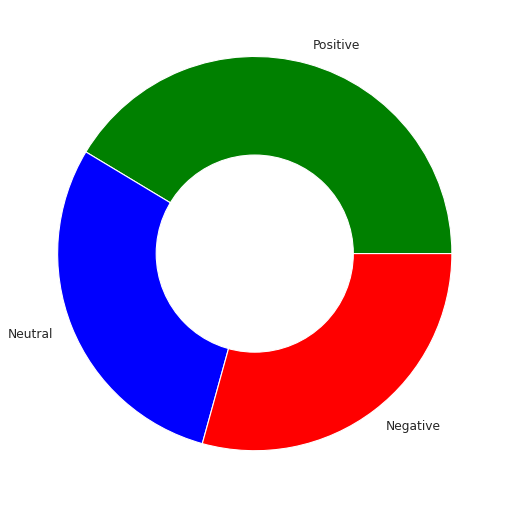

In [ ]:
plt.figure(figsize=(13, 8), dpi=80)
pichart = count_values_in_column(tweet_data,"sentiment")
names= ["Positive","Neutral","Negative"]
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

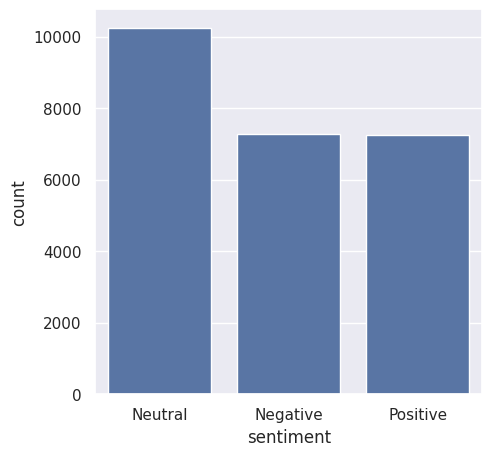

In [ ]:
sns.countplot(data=tweet_data, x="sentiment")
plt.show()

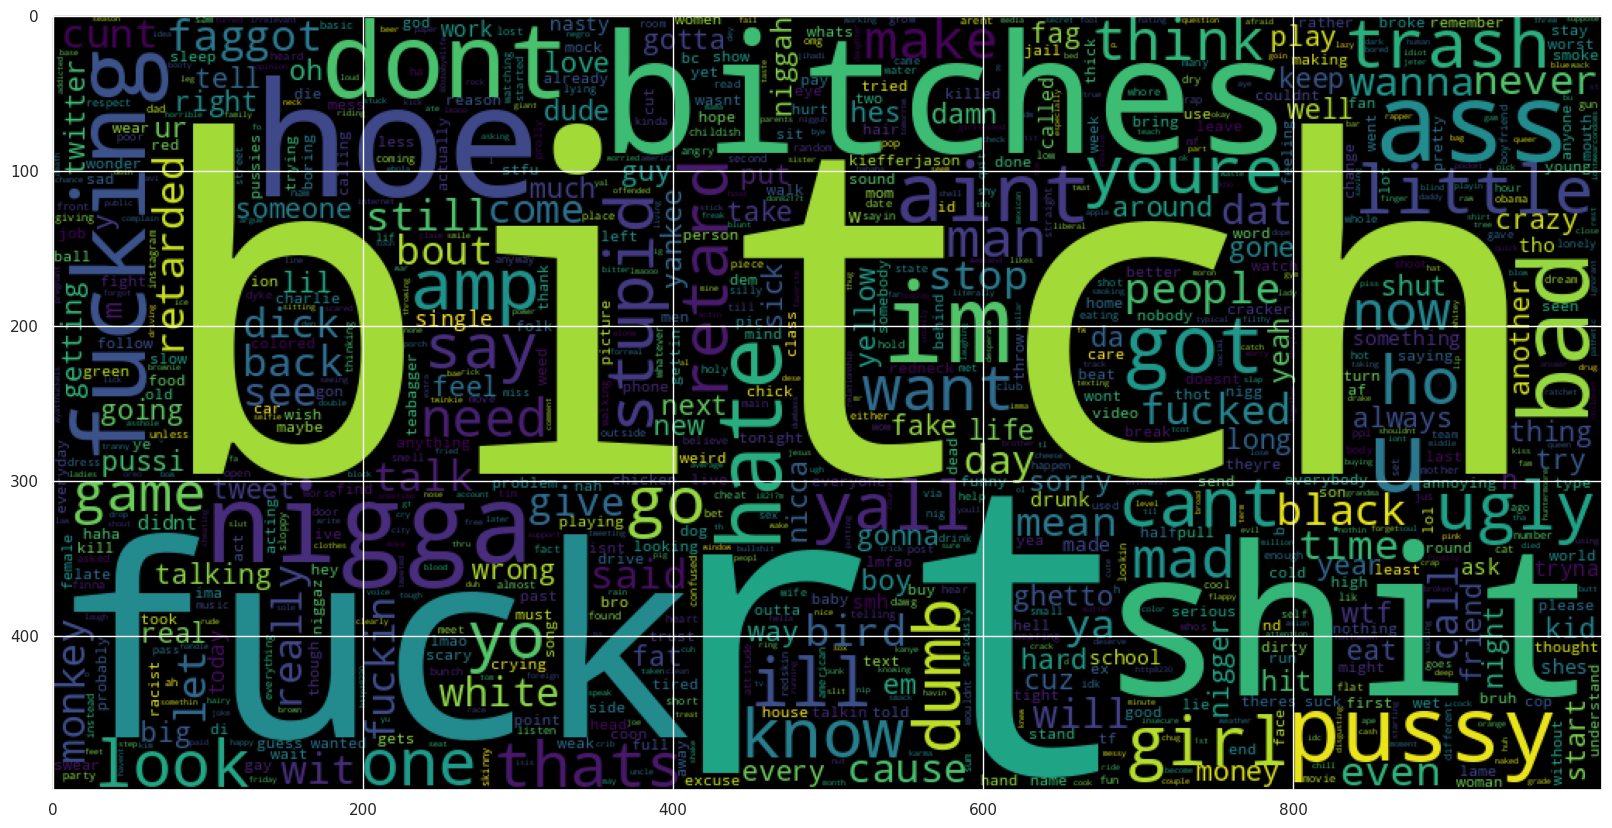

In [ ]:
data_neg = tweet_data_negative['preprocess_tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 500,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.show()

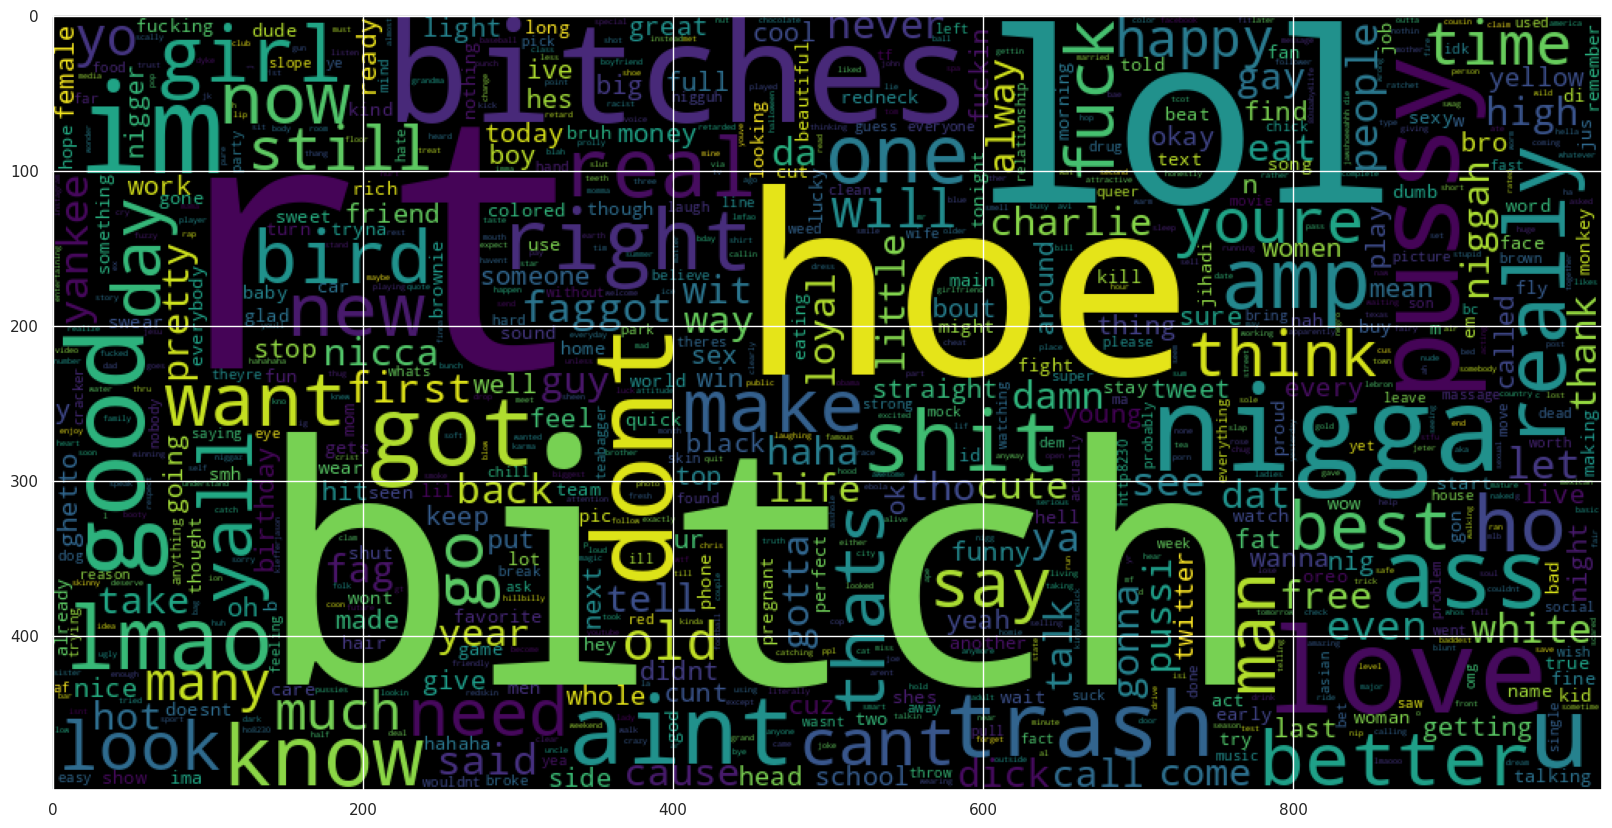

In [ ]:
data_pos = tweet_data_positive['preprocess_tweet']
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1000 , height = 500,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)
plt.show()

In [ ]:
def getSubjectivity(Tweet):
    return TextBlob(Tweet).sentiment.subjectivity

In [ ]:
tweet_data['subjectivity']=tweet_data['preprocess_tweet'].apply(getSubjectivity)
tweet_data.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                                    preprocess_tweet  polarity sentiment  \
0   rt mayasolovely as a woman you shouldnt compl...  0.000000   Neutral   
1   rt mleew17 boy dats coldtyga dwn bad for cuff... -0.700000  Negative   
2   rt urkindofbrand dawg rt 80sbaby4life you eve... -0.333333  Negative   
3     rt cganderson vivabased she look like a tranni  0.000000   Neutral   
4   rt shenikaroberts the shit you hear about me ...  0.075000  Positive   

   subjectivity  
0      0.000000  
1      0.666667  
2      0.700000  
3      0.000000  
4      0.725000

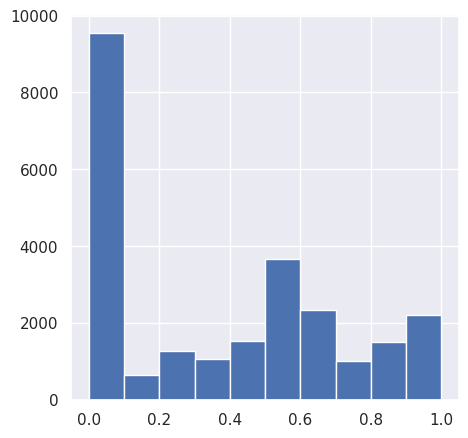

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
tweet_data['subjectivity'].hist()
plt.show()

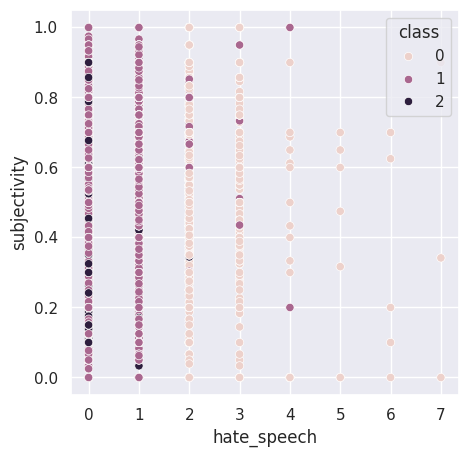

In [ ]:
# scatter plot hue parameter
sns.scatterplot(x = "hate_speech", y = "subjectivity", data = tweet_data, hue = "class")
plt.show()

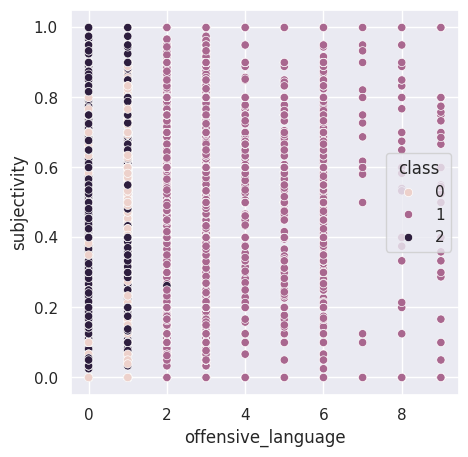

In [ ]:
# scatter plot hue parameter
sns.scatterplot(x = "offensive_language", y = "subjectivity", data = tweet_data, hue = "class")
plt.show()

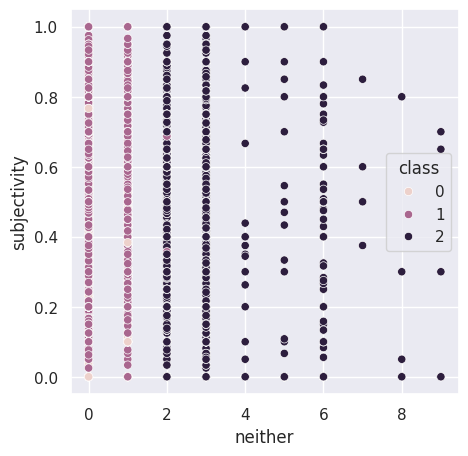

In [ ]:
# scatter plot hue parameter
sns.scatterplot(x = "neither", y = "subjectivity", data = tweet_data, hue = "class")
plt.show()

In [ ]:
tweet_data.to_excel('preprcessed_labeled_data.xlsx',index=False)

In [ ]:
tweet_data = pd.read_excel('preprcessed_labeled_data.xlsx')
print(tweet_data.shape)

(24783, 10)


In [ ]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count               24783 non-null  int64  
 1   hate_speech         24783 non-null  int64  
 2   offensive_language  24783 non-null  int64  
 3   neither             24783 non-null  int64  
 4   class               24783 non-null  int64  
 5   tweet               24782 non-null  object 
 6   preprocess_tweet    24783 non-null  object 
 7   polarity            24783 non-null  float64
 8   sentiment           24783 non-null  object 
 9   subjectivity        24783 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 1.9+ MB


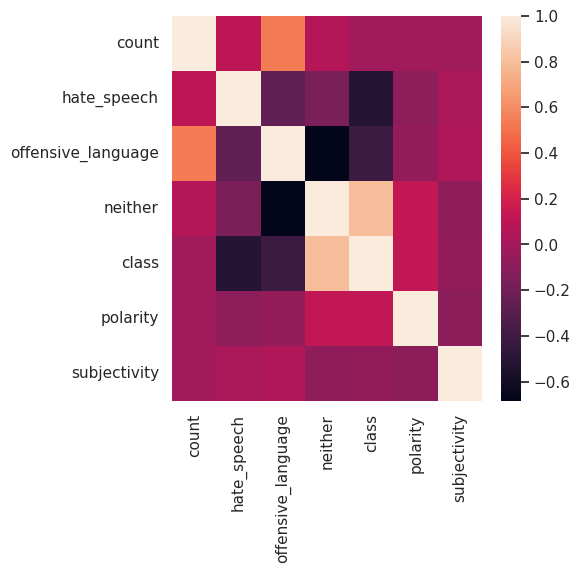

In [ ]:
# calculate the correlation matrix
corr = tweet_data.corr(numeric_only=True) # Include numeric_only=True

# plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)
plt.show()

In [ ]:
X=tweet_data['preprocess_tweet']
Y=tweet_data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17348,)
(7435,)
(17348,)
(7435,)


In [ ]:
vectoriser = CountVectorizer()
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  32461


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

84.76126429051783


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8476126429051782
              precision    recall  f1-score   support

           0       0.50      0.02      0.04       427
           1       0.84      0.99      0.91      5747
           2       0.90      0.47      0.62      1261

    accuracy                           0.85      7435
   macro avg       0.75      0.49      0.52      7435
weighted avg       0.83      0.85      0.81      7435



[[   9  395   23]
 [   8 5699   40]
 [   1  666  594]]


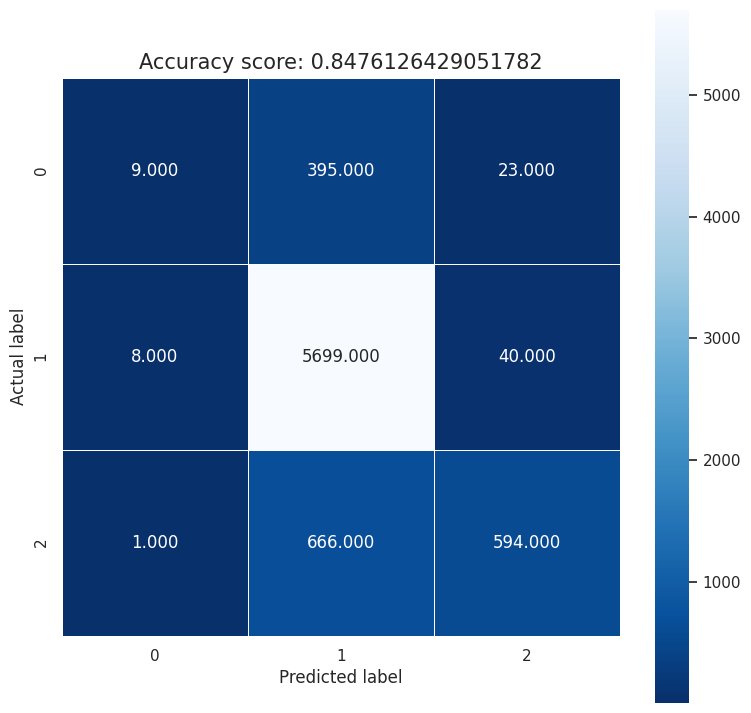

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [ ]:
vectoriser = TfidfVectorizer()
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  32461


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

78.37256220578345


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.7837256220578346
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       427
           1       0.78      1.00      0.88      5747
           2       0.98      0.07      0.12      1261

    accuracy                           0.78      7435
   macro avg       0.59      0.35      0.33      7435
weighted avg       0.77      0.78      0.70      7435



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[[   0  427    0]
 [   0 5745    2]
 [   0 1179   82]]


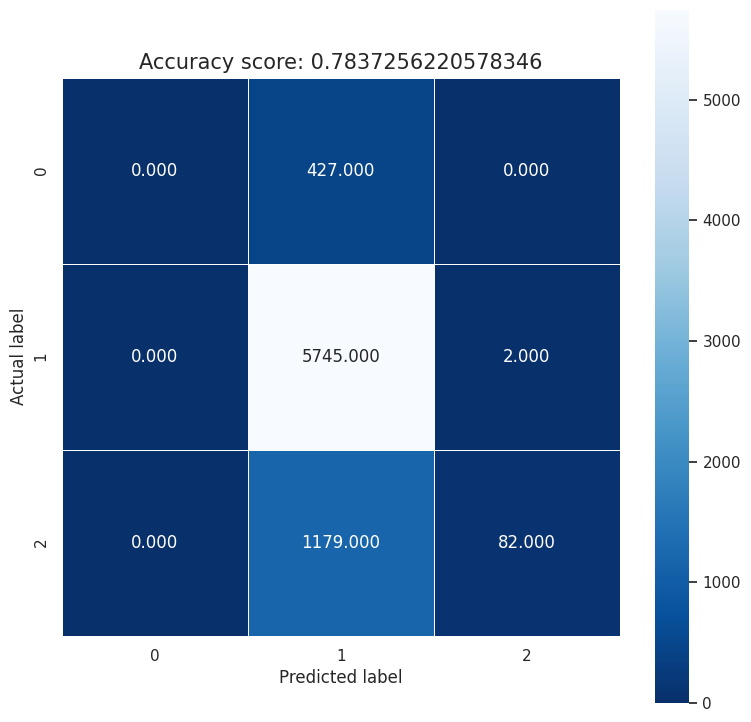

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17348,)
(7435,)
(17348,)
(7435,)


In [ ]:
vectoriser = CountVectorizer()
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  32461


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

87.6126429051782


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8761264290517821
              precision    recall  f1-score   support

           0       0.33      0.21      0.26       427
           1       0.92      0.93      0.93      5747
           2       0.79      0.85      0.82      1261

    accuracy                           0.88      7435
   macro avg       0.68      0.66      0.67      7435
weighted avg       0.87      0.88      0.87      7435



[[  89  286   52]
 [ 158 5356  233]
 [  20  172 1069]]


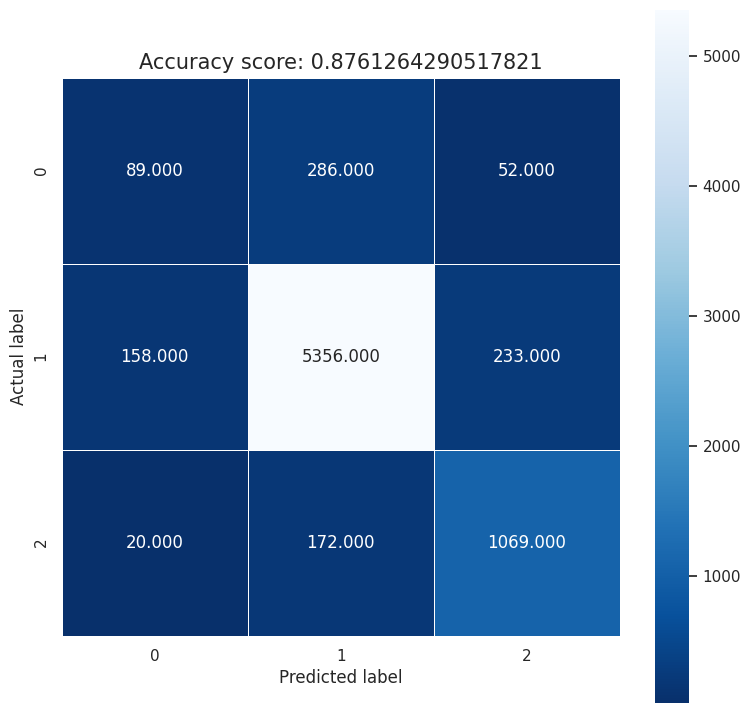

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [ ]:
vectoriser = TfidfVectorizer()
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  32461


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

86.80564895763283


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8680564895763282
              precision    recall  f1-score   support

           0       0.35      0.30      0.32       427
           1       0.92      0.92      0.92      5747
           2       0.78      0.80      0.79      1261

    accuracy                           0.87      7435
   macro avg       0.68      0.68      0.68      7435
weighted avg       0.86      0.87      0.87      7435



[[ 127  255   45]
 [ 191 5313  243]
 [  41  206 1014]]


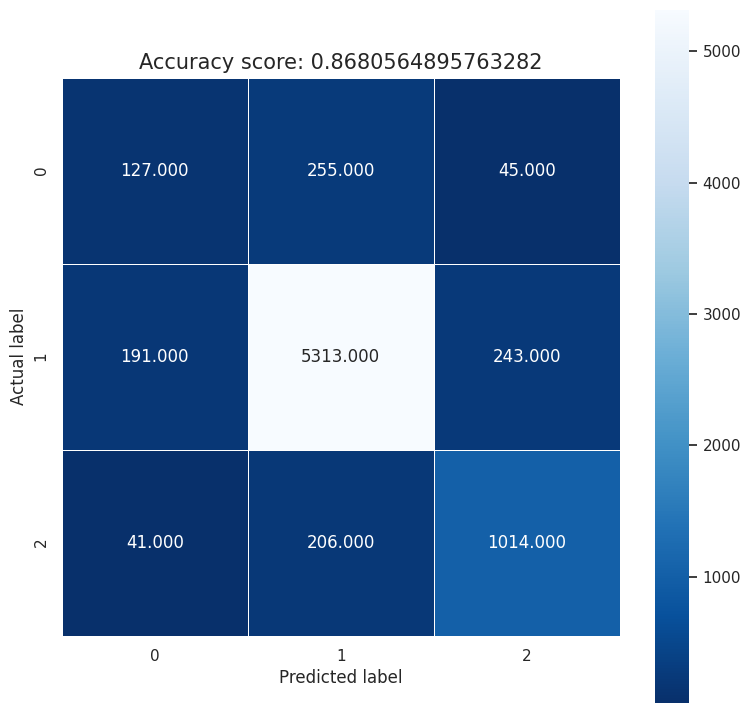

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state = 0)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17348,)
(7435,)
(17348,)
(7435,)


In [ ]:
vectoriser = CountVectorizer()
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

Vectoriser fitted.
No. of feature_words:  32461


In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


In [ ]:
clf = MultinomialNB(alpha=1.0, fit_prior=False, class_prior=None)
clf.fit(X_train, y_train)

MultinomialNB(fit_prior=False)

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

86.21385339609952


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8621385339609953
              precision    recall  f1-score   support

           0       0.41      0.12      0.19       427
           1       0.87      0.97      0.92      5747
           2       0.85      0.61      0.71      1261

    accuracy                           0.86      7435
   macro avg       0.71      0.57      0.61      7435
weighted avg       0.84      0.86      0.84      7435



[[  53  336   38]
 [  62 5589   96]
 [  13  480  768]]


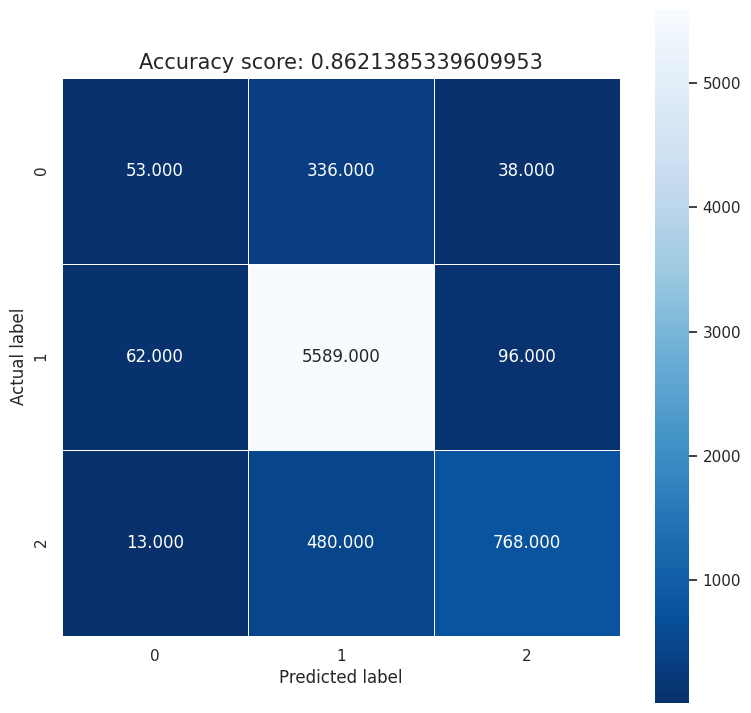

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',splitter='best',max_features=None, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

87.6126429051782


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8761264290517821
              precision    recall  f1-score   support

           0       0.33      0.21      0.26       427
           1       0.92      0.93      0.93      5747
           2       0.79      0.85      0.82      1261

    accuracy                           0.88      7435
   macro avg       0.68      0.66      0.67      7435
weighted avg       0.87      0.88      0.87      7435



[[  89  286   52]
 [ 158 5356  233]
 [  20  172 1069]]


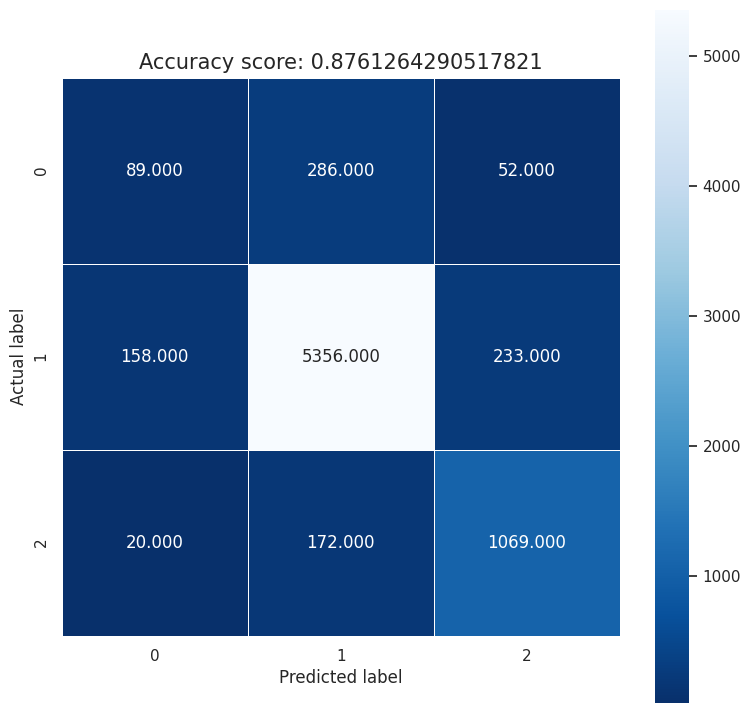

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs=GridSearchCV(DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=None, random_state=0),
             param_grid={'max_depth': list(range(2, 100))},
             verbose=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 98 candidates, totalling 490 fits
[CV 1/5] END .......................max_depth=2;, score=0.775 total time=   0.5s
[CV 2/5] END .......................max_depth=2;, score=0.775 total time=   0.5s
[CV 3/5] END .......................max_depth=2;, score=0.775 total time=   0.5s
[CV 4/5] END .......................max_depth=2;, score=0.775 total time=   0.5s
[CV 5/5] END .......................max_depth=2;, score=0.775 total time=   0.5s
[CV 1/5] END .......................max_depth=3;, score=0.775 total time=   0.5s
[CV 2/5] END .......................max_depth=3;, score=0.774 total time=   0.5s
[CV 3/5] END .......................max_depth=3;, score=0.775 total time=   0.5s
[CV 4/5] END .......................max_depth=3;, score=0.775 total time=   0.5s
[CV 5/5] END .......................max_depth=3;, score=0.775 total time=   0.5s
[CV 1/5] END .......................max_depth=4;, score=0.775 total time=   0.5s
[CV 2/5] END .......................max_depth=4

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30, 31, ...]},
             verbose=3)

In [ ]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=65, random_state=0)

In [ ]:
gs.best_params_

{'max_depth': 65}

In [ ]:
gs=GridSearchCV(DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=65, random_state=0),
             param_grid={'min_samples_split': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
             verbose=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .............min_samples_split=0.1;, score=0.890 total time=   1.6s
[CV 2/5] END .............min_samples_split=0.1;, score=0.883 total time=   1.1s
[CV 3/5] END .............min_samples_split=0.1;, score=0.887 total time=   1.2s
[CV 4/5] END .............min_samples_split=0.1;, score=0.894 total time=   1.1s
[CV 5/5] END .............min_samples_split=0.1;, score=0.892 total time=   1.2s
[CV 1/5] END .............min_samples_split=0.2;, score=0.883 total time=   1.0s
[CV 2/5] END .............min_samples_split=0.2;, score=0.878 total time=   1.0s
[CV 3/5] END .............min_samples_split=0.2;, score=0.882 total time=   1.0s
[CV 4/5] END .............min_samples_split=0.2;, score=0.887 total time=   1.0s
[CV 5/5] END .............min_samples_split=0.2;, score=0.888 total time=   1.2s
[CV 1/5] END .............min_samples_split=0.3;, score=0.830 total time=   1.4s
[CV 2/5] END .............min_samples_split=0.3;,

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=65, random_state=0),
             param_grid={'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                               0.7, 0.8, 0.9]},
             verbose=3)

In [ ]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=65, min_samples_split=0.1, random_state=0)

In [ ]:
gs.best_params_

{'min_samples_split': 0.1}

In [ ]:
gs=GridSearchCV(DecisionTreeClassifier(criterion='gini',splitter='best',
                                 max_depth=65,min_samples_split=0.1, random_state=0),
             param_grid={'min_samples_leaf': list(range(1, 10))},
             verbose=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ................min_samples_leaf=1;, score=0.890 total time=   1.2s
[CV 2/5] END ................min_samples_leaf=1;, score=0.883 total time=   1.1s
[CV 3/5] END ................min_samples_leaf=1;, score=0.887 total time=   1.2s
[CV 4/5] END ................min_samples_leaf=1;, score=0.894 total time=   1.2s
[CV 5/5] END ................min_samples_leaf=1;, score=0.892 total time=   2.0s
[CV 1/5] END ................min_samples_leaf=2;, score=0.888 total time=   1.7s
[CV 2/5] END ................min_samples_leaf=2;, score=0.884 total time=   1.0s
[CV 3/5] END ................min_samples_leaf=2;, score=0.883 total time=   1.1s
[CV 4/5] END ................min_samples_leaf=2;, score=0.894 total time=   1.0s
[CV 5/5] END ................min_samples_leaf=2;, score=0.891 total time=   1.0s
[CV 1/5] END ................min_samples_leaf=3;, score=0.890 total time=   1.0s
[CV 2/5] END ................min_samples_leaf=3;,

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=65,
                                              min_samples_split=0.1,
                                              random_state=0),
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=3)

In [ ]:
gs.best_params_

{'min_samples_leaf': 4}

In [ ]:
gs=GridSearchCV(DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=65,min_samples_split=0.1, random_state=0),
             param_grid={'min_samples_leaf': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
             verbose=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............min_samples_leaf=0.1;, score=0.775 total time=   0.5s
[CV 2/5] END ..............min_samples_leaf=0.1;, score=0.775 total time=   0.5s
[CV 3/5] END ..............min_samples_leaf=0.1;, score=0.775 total time=   0.5s
[CV 4/5] END ..............min_samples_leaf=0.1;, score=0.775 total time=   0.5s
[CV 5/5] END ..............min_samples_leaf=0.1;, score=0.775 total time=   0.5s
[CV 1/5] END ..............min_samples_leaf=0.2;, score=0.775 total time=   0.5s
[CV 2/5] END ..............min_samples_leaf=0.2;, score=0.775 total time=   0.5s
[CV 3/5] END ..............min_samples_leaf=0.2;, score=0.775 total time=   0.5s
[CV 4/5] END ..............min_samples_leaf=0.2;, score=0.775 total time=   0.5s
[CV 5/5] END ..............min_samples_leaf=0.2;, score=0.775 total time=   0.5s
[CV 1/5] END ..............min_samples_leaf=0.3;, score=0.775 total time=   0.5s
[CV 2/5] END ..............min_samples_leaf=0.3;,

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=65,
                                              min_samples_split=0.1,
                                              random_state=0),
             param_grid={'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 0.9]},
             verbose=3)

In [ ]:
gs.best_params_

{'min_samples_leaf': 0.1}

In [ ]:
gs=GridSearchCV(DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=65, min_samples_split=0.1,
                             min_samples_leaf=4,random_state=0),
             param_grid={'max_features': list(range(1, 10))},
             verbose=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................max_features=1;, score=0.775 total time=   0.0s
[CV 2/5] END ....................max_features=1;, score=0.775 total time=   0.0s
[CV 3/5] END ....................max_features=1;, score=0.775 total time=   0.0s
[CV 4/5] END ....................max_features=1;, score=0.775 total time=   0.0s
[CV 5/5] END ....................max_features=1;, score=0.775 total time=   0.0s
[CV 1/5] END ....................max_features=2;, score=0.775 total time=   0.0s
[CV 2/5] END ....................max_features=2;, score=0.775 total time=   0.0s
[CV 3/5] END ....................max_features=2;, score=0.775 total time=   0.0s
[CV 4/5] END ....................max_features=2;, score=0.775 total time=   0.0s
[CV 5/5] END ....................max_features=2;, score=0.775 total time=   0.0s
[CV 1/5] END ....................max_features=3;, score=0.775 total time=   0.0s
[CV 2/5] END ....................max_features=3;,

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=65, min_samples_leaf=4,
                                              min_samples_split=0.1,
                                              random_state=0),
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             verbose=3)

In [ ]:
gs.best_params_

{'max_features': 9}

In [ ]:
gs=GridSearchCV(DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=65, min_samples_split=0.1,
                             min_samples_leaf=4,random_state=0),
             param_grid={'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
             verbose=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................max_features=0.1;, score=0.879 total time=   0.8s
[CV 2/5] END ..................max_features=0.1;, score=0.871 total time=   0.8s
[CV 3/5] END ..................max_features=0.1;, score=0.855 total time=   0.8s
[CV 4/5] END ..................max_features=0.1;, score=0.864 total time=   0.8s
[CV 5/5] END ..................max_features=0.1;, score=0.830 total time=   0.7s
[CV 1/5] END ..................max_features=0.2;, score=0.839 total time=   0.9s
[CV 2/5] END ..................max_features=0.2;, score=0.854 total time=   1.2s
[CV 3/5] END ..................max_features=0.2;, score=0.868 total time=   1.0s
[CV 4/5] END ..................max_features=0.2;, score=0.841 total time=   1.6s
[CV 5/5] END ..................max_features=0.2;, score=0.839 total time=   1.8s
[CV 1/5] END ..................max_features=0.3;, score=0.881 total time=   1.6s
[CV 2/5] END ..................max_features=0.3;,

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=65, min_samples_leaf=4,
                                              min_samples_split=0.1,
                                              random_state=0),
             param_grid={'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9]},
             verbose=3)

In [ ]:
gs.best_params_

{'max_features': 0.9}

In [ ]:
gs=GridSearchCV(DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=65, min_samples_split=0.1,
                             min_samples_leaf=4,max_features=None,random_state=0),
             param_grid={'max_leaf_nodes': list(range(1, 100))},
             verbose=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ....................max_leaf_nodes=1;, score=nan total time=   0.0s
[CV 2/5] END ....................max_leaf_nodes=1;, score=nan total time=   0.0s
[CV 3/5] END ....................max_leaf_nodes=1;, score=nan total time=   0.0s
[CV 4/5] END ....................max_leaf_nodes=1;, score=nan total time=   0.0s
[CV 5/5] END ....................max_leaf_nodes=1;, score=nan total time=   0.0s
[CV 1/5] END ..................max_leaf_nodes=2;, score=0.775 total time=   0.9s
[CV 2/5] END ..................max_leaf_nodes=2;, score=0.775 total time=   0.9s
[CV 3/5] END ..................max_leaf_nodes=2;, score=0.775 total time=   0.9s
[CV 4/5] END ..................max_leaf_nodes=2;, score=0.775 total time=   1.5s
[CV 5/5] END ..................max_leaf_nodes=2;, score=0.775 total time=   1.8s
[CV 1/5] END ..................max_leaf_nodes=3;, score=0.775 total time=   1.3s
[CV 2/5] END ..................max_leaf_nodes=3

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_p

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=65, min_samples_leaf=4,
                                              min_samples_split=0.1,
                                              random_state=0),
             param_grid={'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]},
             verbose=3)

In [ ]:
gs.best_params_

{'max_leaf_nodes': 63}

In [ ]:
gs=GridSearchCV(DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=65, min_samples_split=0.1,
                             min_samples_leaf=4,max_features=None,
                                       max_leaf_nodes=63,random_state=0),
             param_grid={'min_impurity_decrease': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},
             verbose=3)

In [ ]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .........min_impurity_decrease=0.1;, score=0.775 total time=   0.5s
[CV 2/5] END .........min_impurity_decrease=0.1;, score=0.775 total time=   0.4s
[CV 3/5] END .........min_impurity_decrease=0.1;, score=0.775 total time=   0.5s
[CV 4/5] END .........min_impurity_decrease=0.1;, score=0.775 total time=   0.4s
[CV 5/5] END .........min_impurity_decrease=0.1;, score=0.775 total time=   0.5s
[CV 1/5] END .........min_impurity_decrease=0.2;, score=0.775 total time=   0.6s
[CV 2/5] END .........min_impurity_decrease=0.2;, score=0.775 total time=   0.9s
[CV 3/5] END .........min_impurity_decrease=0.2;, score=0.775 total time=   0.9s
[CV 4/5] END .........min_impurity_decrease=0.2;, score=0.775 total time=   0.9s
[CV 5/5] END .........min_impurity_decrease=0.2;, score=0.775 total time=   0.5s
[CV 1/5] END .........min_impurity_decrease=0.3;, score=0.775 total time=   0.5s
[CV 2/5] END .........min_impurity_decrease=0.3;,

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=65, max_leaf_nodes=63,
                                              min_samples_leaf=4,
                                              min_samples_split=0.1,
                                              random_state=0),
             param_grid={'min_impurity_decrease': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                   0.7, 0.8, 0.9]},
             verbose=3)

In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
gs.best_params_

{'min_impurity_decrease': 0.1}

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=65, min_samples_split=0.1,
                             min_samples_leaf=4,max_features=None,
                             max_leaf_nodes=None,min_impurity_decrease=0.0,
                             random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=65, min_samples_leaf=4, min_samples_split=0.1,
                       random_state=0)

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

89.45527908540686


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8945527908540686
              precision    recall  f1-score   support

           0       0.44      0.15      0.22       427
           1       0.94      0.94      0.94      5747
           2       0.77      0.93      0.84      1261

    accuracy                           0.89      7435
   macro avg       0.72      0.67      0.67      7435
weighted avg       0.88      0.89      0.88      7435



[[  63  290   74]
 [  58 5410  279]
 [  22   61 1178]]


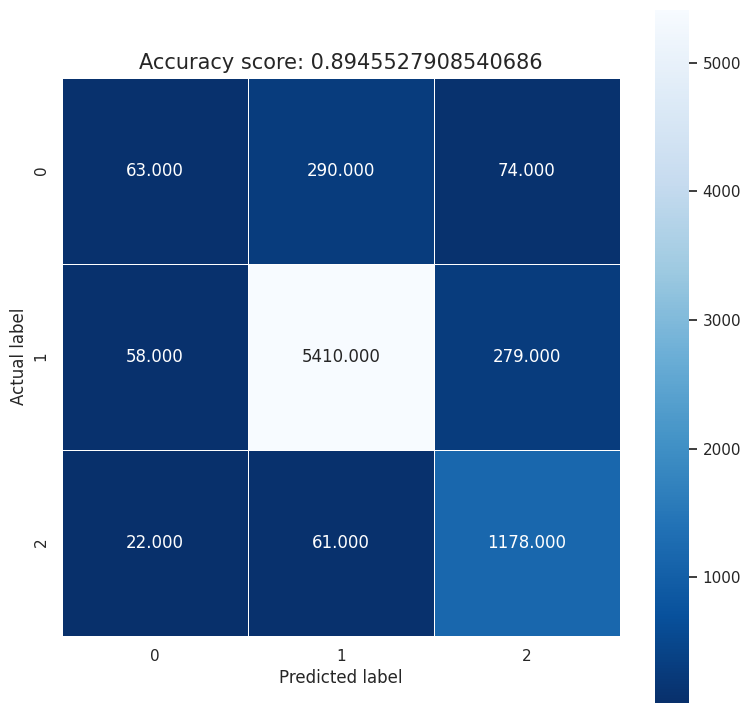

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(
                             random_state=0))
clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0))

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

88.95763281775386


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8895763281775386
              precision    recall  f1-score   support

           0       0.41      0.23      0.29       427
           1       0.93      0.93      0.93      5747
           2       0.79      0.91      0.85      1261

    accuracy                           0.89      7435
   macro avg       0.71      0.69      0.69      7435
weighted avg       0.88      0.89      0.88      7435



[[  97  274   56]
 [ 129 5369  249]
 [  12  101 1148]]


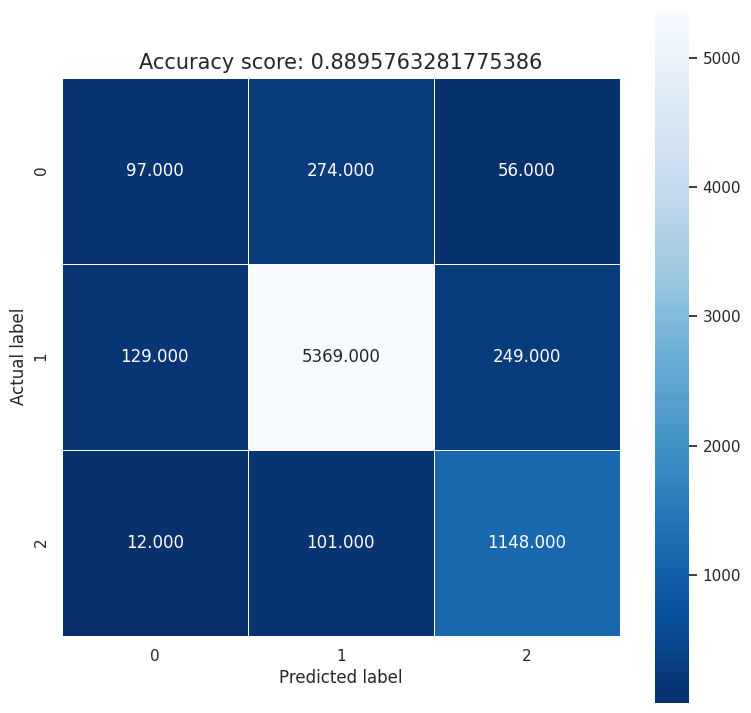

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=65, min_samples_split=0.1,
                             min_samples_leaf=4,max_features=None,
                             max_leaf_nodes=None,min_impurity_decrease=0.0,
                             random_state=0))
clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=65,
                                                   min_samples_leaf=4,
                                                   min_samples_split=0.1,
                                                   random_state=0))

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

89.18628110289173


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8918628110289173
              precision    recall  f1-score   support

           0       0.43      0.12      0.19       427
           1       0.94      0.94      0.94      5747
           2       0.74      0.95      0.83      1261

    accuracy                           0.89      7435
   macro avg       0.71      0.67      0.65      7435
weighted avg       0.88      0.89      0.88      7435



[[  52  279   96]
 [  49 5381  317]
 [  20   43 1198]]


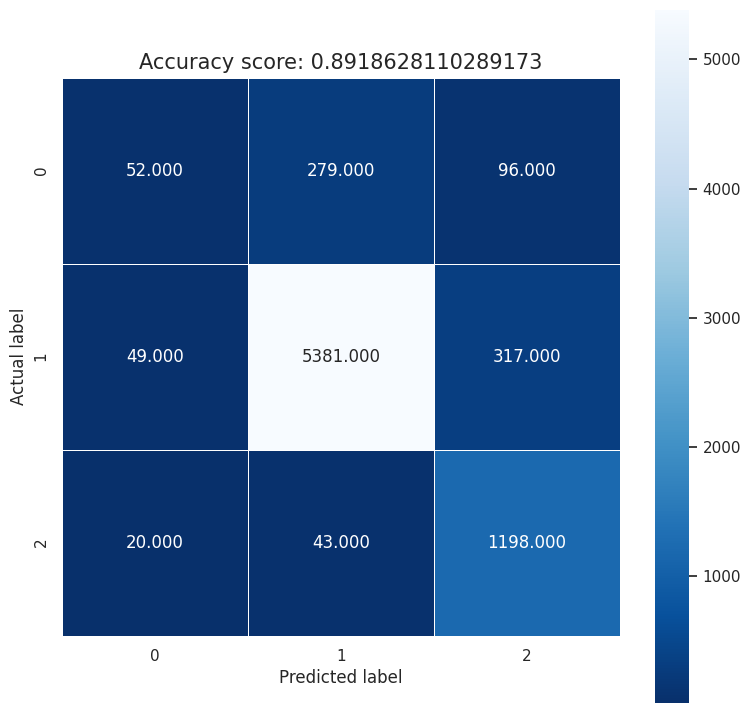

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(
    DecisionTreeClassifier(
    random_state=0))
clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=0))

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

89.11903160726294


In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

Accuracy: 0.8911903160726294
              precision    recall  f1-score   support

           0       0.43      0.24      0.31       427
           1       0.94      0.93      0.94      5747
           2       0.78      0.92      0.84      1261

    accuracy                           0.89      7435
   macro avg       0.72      0.70      0.70      7435
weighted avg       0.88      0.89      0.88      7435



[[ 103  260   64]
 [ 123 5367  257]
 [  13   92 1156]]


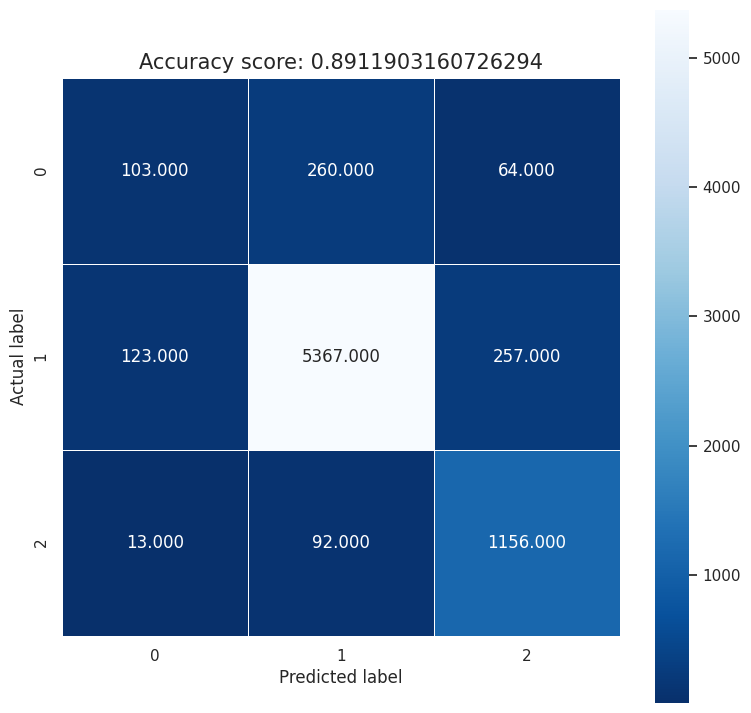

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(
                             random_state=0))
clf.fit(X_train, y_train)

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=65, min_samples_split=0.1,
                             min_samples_leaf=4,max_features=None,
                             max_leaf_nodes=None,min_impurity_decrease=0.0,
                             random_state=0))
clf.fit(X_train, y_train)

In [ ]:
predictions=clf.predict(X_test)
score=clf.score(X_test,y_test)
print(score*100)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
clf1 = MultinomialNB(alpha=1.0, fit_prior=False, class_prior=None)
clf2 = DecisionTreeClassifier(random_state=0)
clf3 = DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=65, min_samples_split=0.1,
                             min_samples_leaf=4,max_features=None,
                             max_leaf_nodes=None,min_impurity_decrease=0.0,
                             random_state=0)
eclf = VotingClassifier(estimators=[('mnb', clf1), ('dt', clf2), ('ft-dt', clf3)],
                        voting='soft', weights=[1, 1, 2])
#
eclf.fit(X_train, y_train)

In [ ]:
predictions=eclf.predict(X_test)
score=eclf.score(X_test,y_test)
print(score*100)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print(metrics.classification_report(y_test,predictions))

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label")
all_sample_title="Accuracy score: {0}".format(score)
plt.title(all_sample_title,size=15)
plt.show()